# Covid 19 project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/ACER/Desktop/Assignments/covid_19_clean_.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.rename(columns={'Province/State' : 'State','Country/Region':'Country'},inplace=True)

In [6]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
df['Date'].max()

'2020-07-27'

In [8]:
top=df[df['Date']=='2020-07-27']

In [9]:
top.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [10]:
top.groupby(by='Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [11]:
Confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [12]:
Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


<Axes: xlabel='Date', ylabel='Confirmed'>

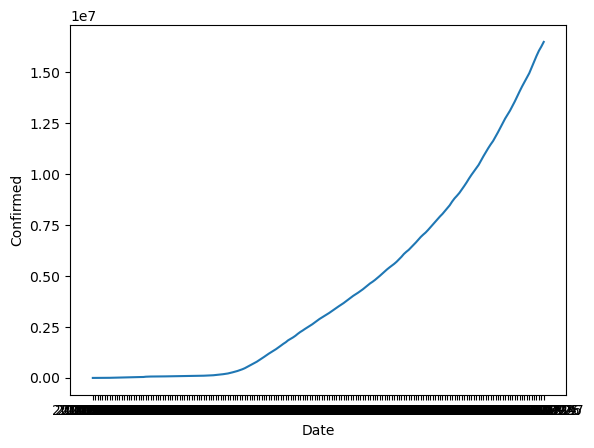

In [13]:
sns.lineplot(data=Confirmed, x='Date', y='Confirmed')

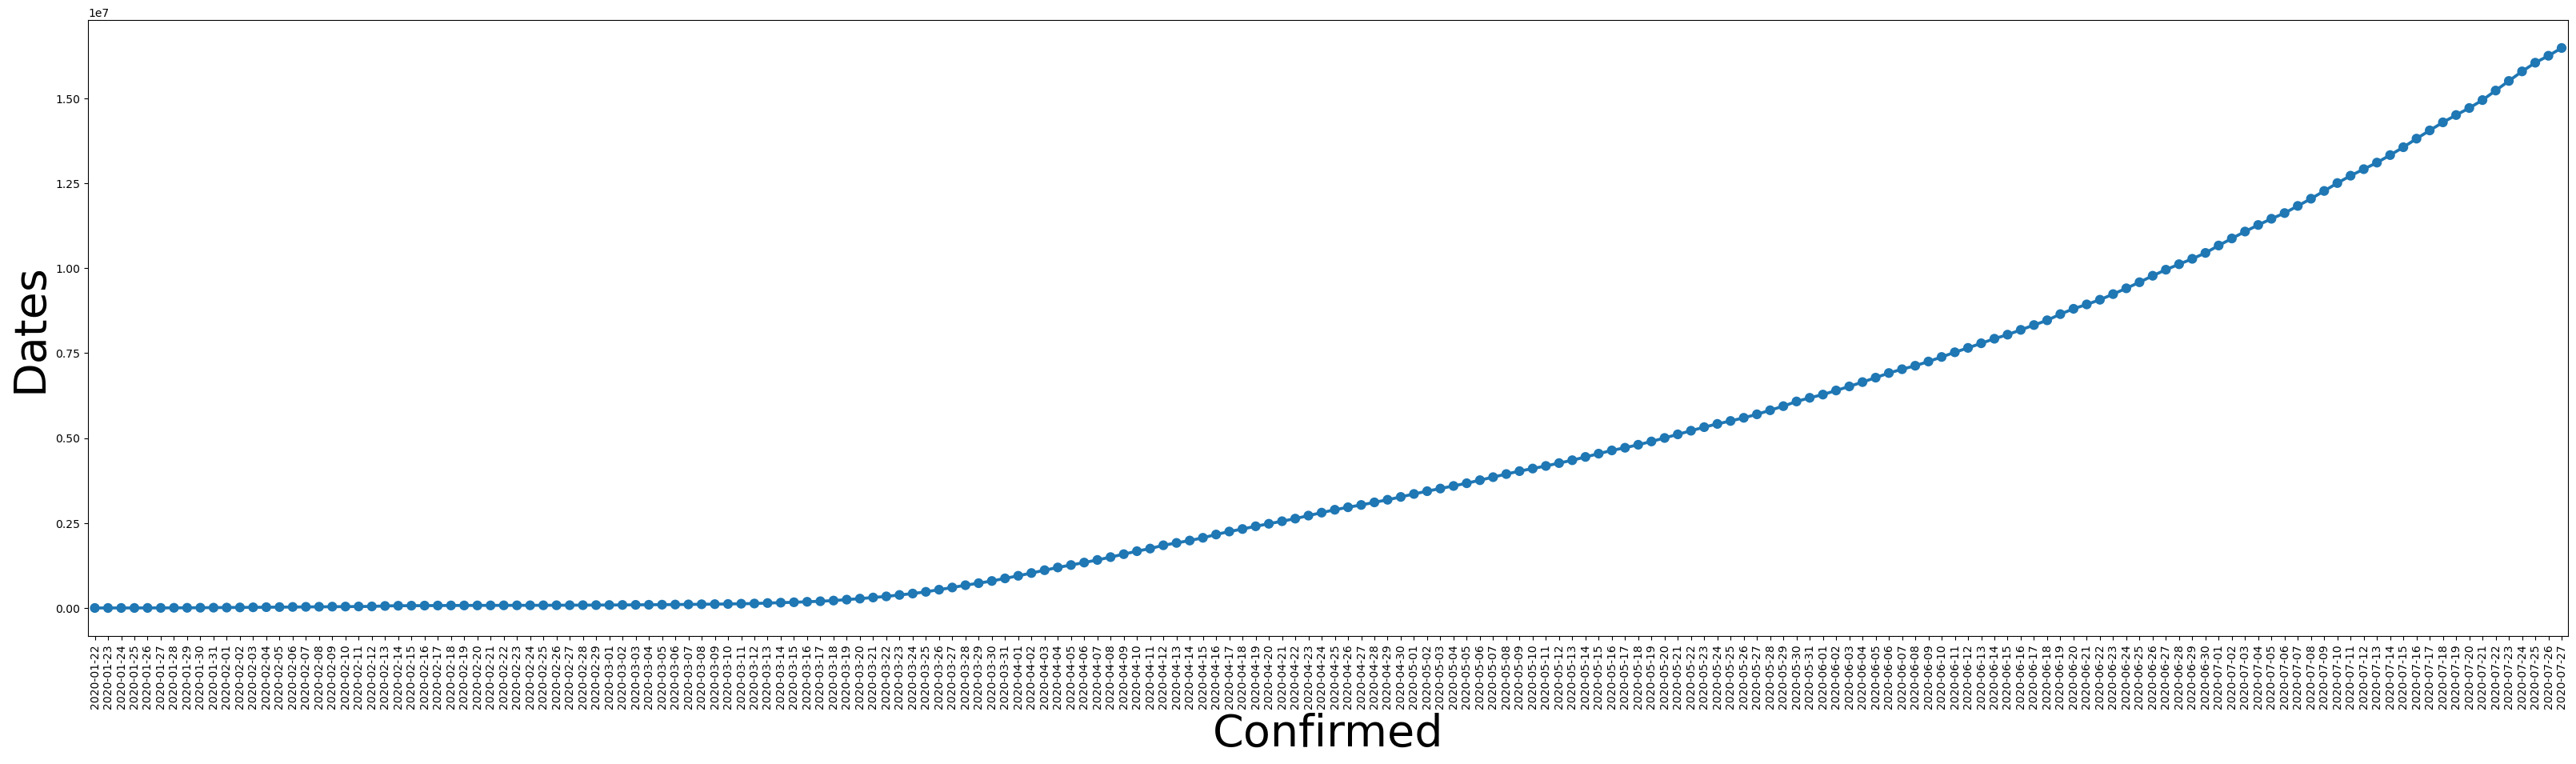

In [14]:
plt.figure(figsize=(40,10))
sns.pointplot(data=Confirmed, x='Date', y='Confirmed')

plt.xticks(rotation=90, fontsize=10)

plt.xlabel('Confirmed',fontsize=40)
plt.ylabel('Dates',fontsize=40)

plt.show()

# Top 10 countries with most recovered cases

In [15]:
top_10_recovered = df.groupby(by='Country')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

In [16]:
top_10_recovered

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


Text(0.5, 1.0, 'Top 10 countries in recovered cases')

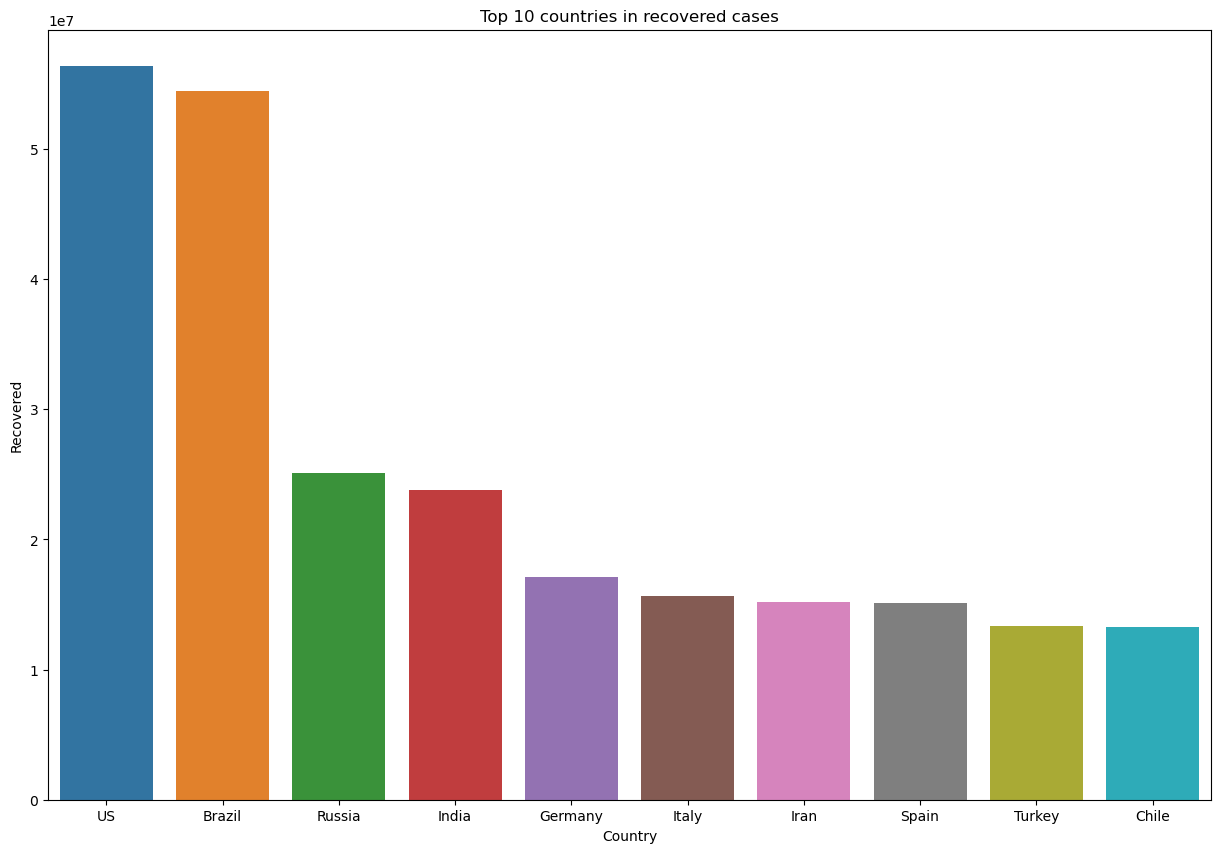

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(data=top_10_recovered, x='Country', y='Recovered')
plt.title('Top 10 countries in recovered cases')

# Top 10 countries with most deaths cases


In [18]:
top_10_active = df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()

In [19]:
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


Text(0.5, 1.0, 'Top 10 countries in recovered cases')

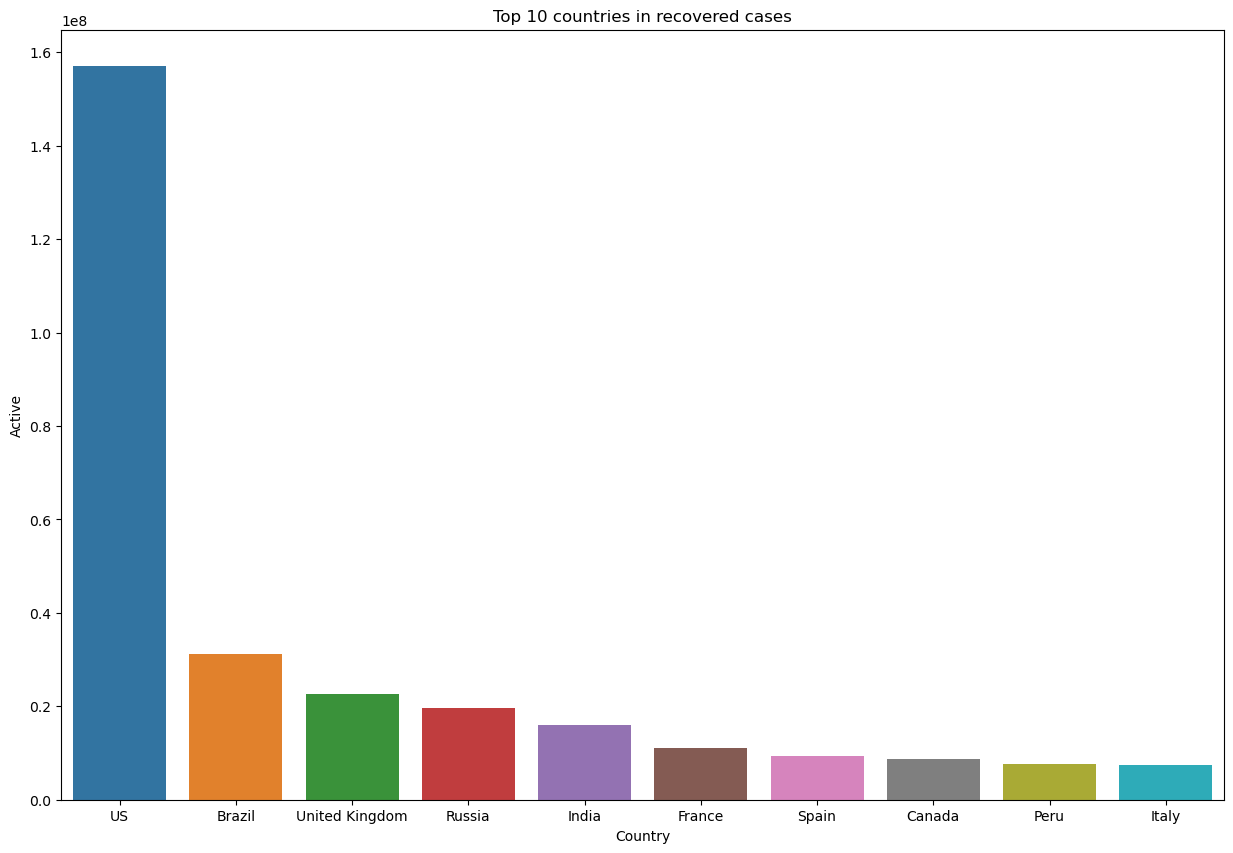

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(data=top_10_active, x='Country', y='Active')
plt.title('Top 10 countries in recovered cases')

# Country based analysis

In [21]:
US = df[df['Country']=='US']

In [22]:
US

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [23]:
US = US.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [24]:
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [25]:
df.Country.unique()  

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [26]:
china = df[df['Country']== 'China']

In [27]:
china = china.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [28]:
china

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [29]:
india = df[df['Country']== 'India']

In [30]:
india = india.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [31]:
india

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


# Compare these countries on the basis of Death cases

Text(0, 0.5, 'No. of Deaths')

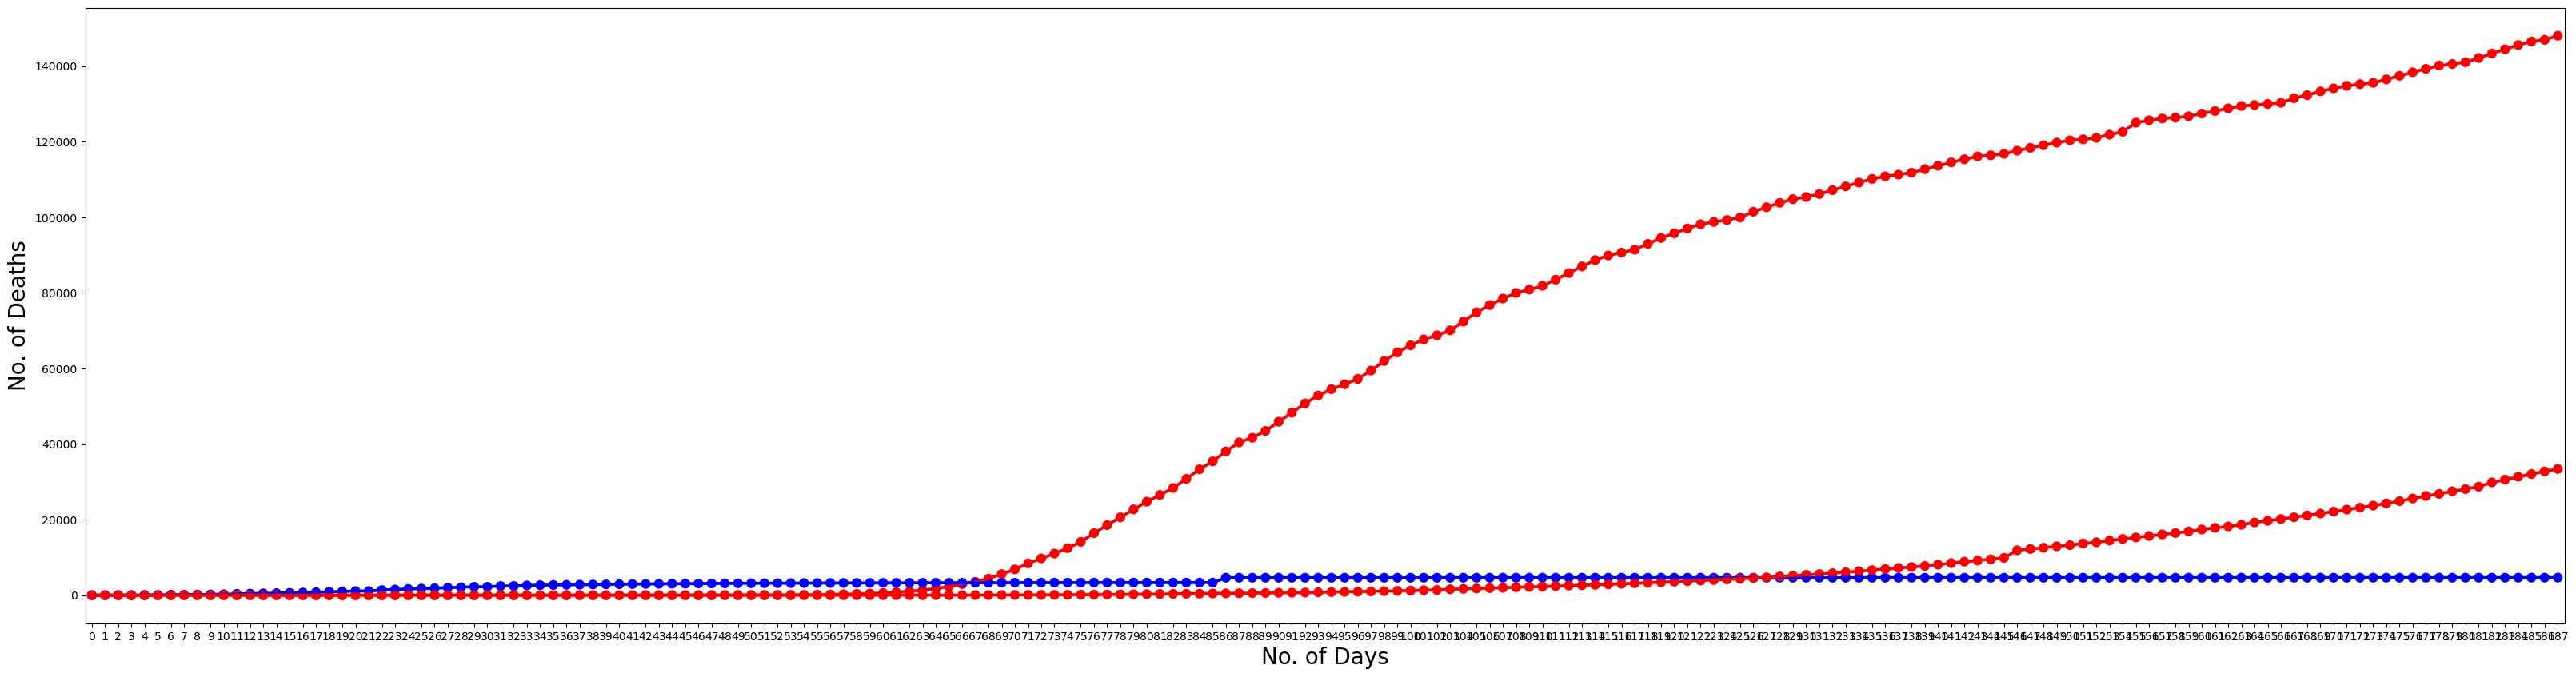

In [32]:
plt.figure(figsize=(40,10))

sns.pointplot(x=US.index, y=US.Deaths, color='Red')
sns.pointplot(x=china.index, y=china.Deaths, color='Blue')
sns.pointplot(x=india.index, y=india.Deaths, color='Red')

plt.xlabel('No. of Days', fontsize=20)
plt.ylabel('No. of Deaths', fontsize=20)

  # Compare these countries on the basis of Confirmed cases

Text(0, 0.5, 'No. of Deaths')

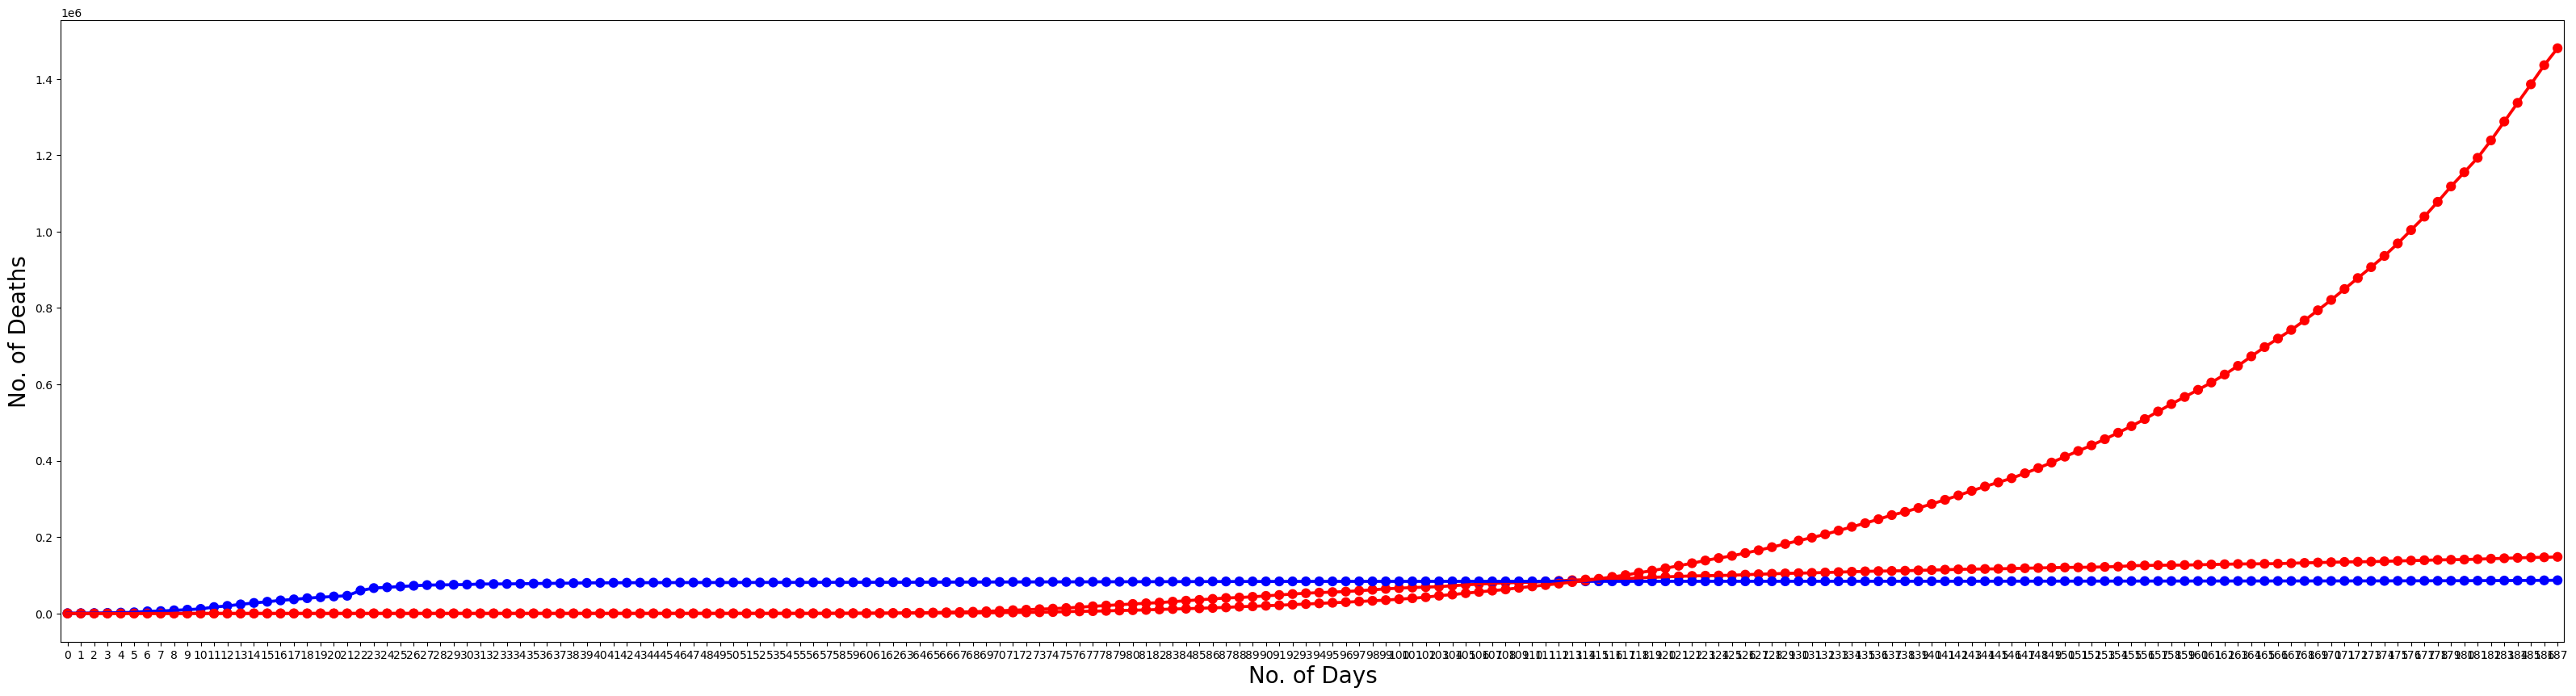

In [33]:
plt.figure(figsize=(40,10))

sns.pointplot(x=US.index, y=US.Deaths, color='Red')
sns.pointplot(x=china.index, y=china.Confirmed, color='Blue')
sns.pointplot(x=india.index, y=india.Confirmed, color='Red')

plt.xlabel('No. of Days', fontsize=20)
plt.ylabel('No. of Deaths', fontsize=20)

# Compare these countries on the basis of Recovered cases

Text(0, 0.5, 'No. of Deaths')

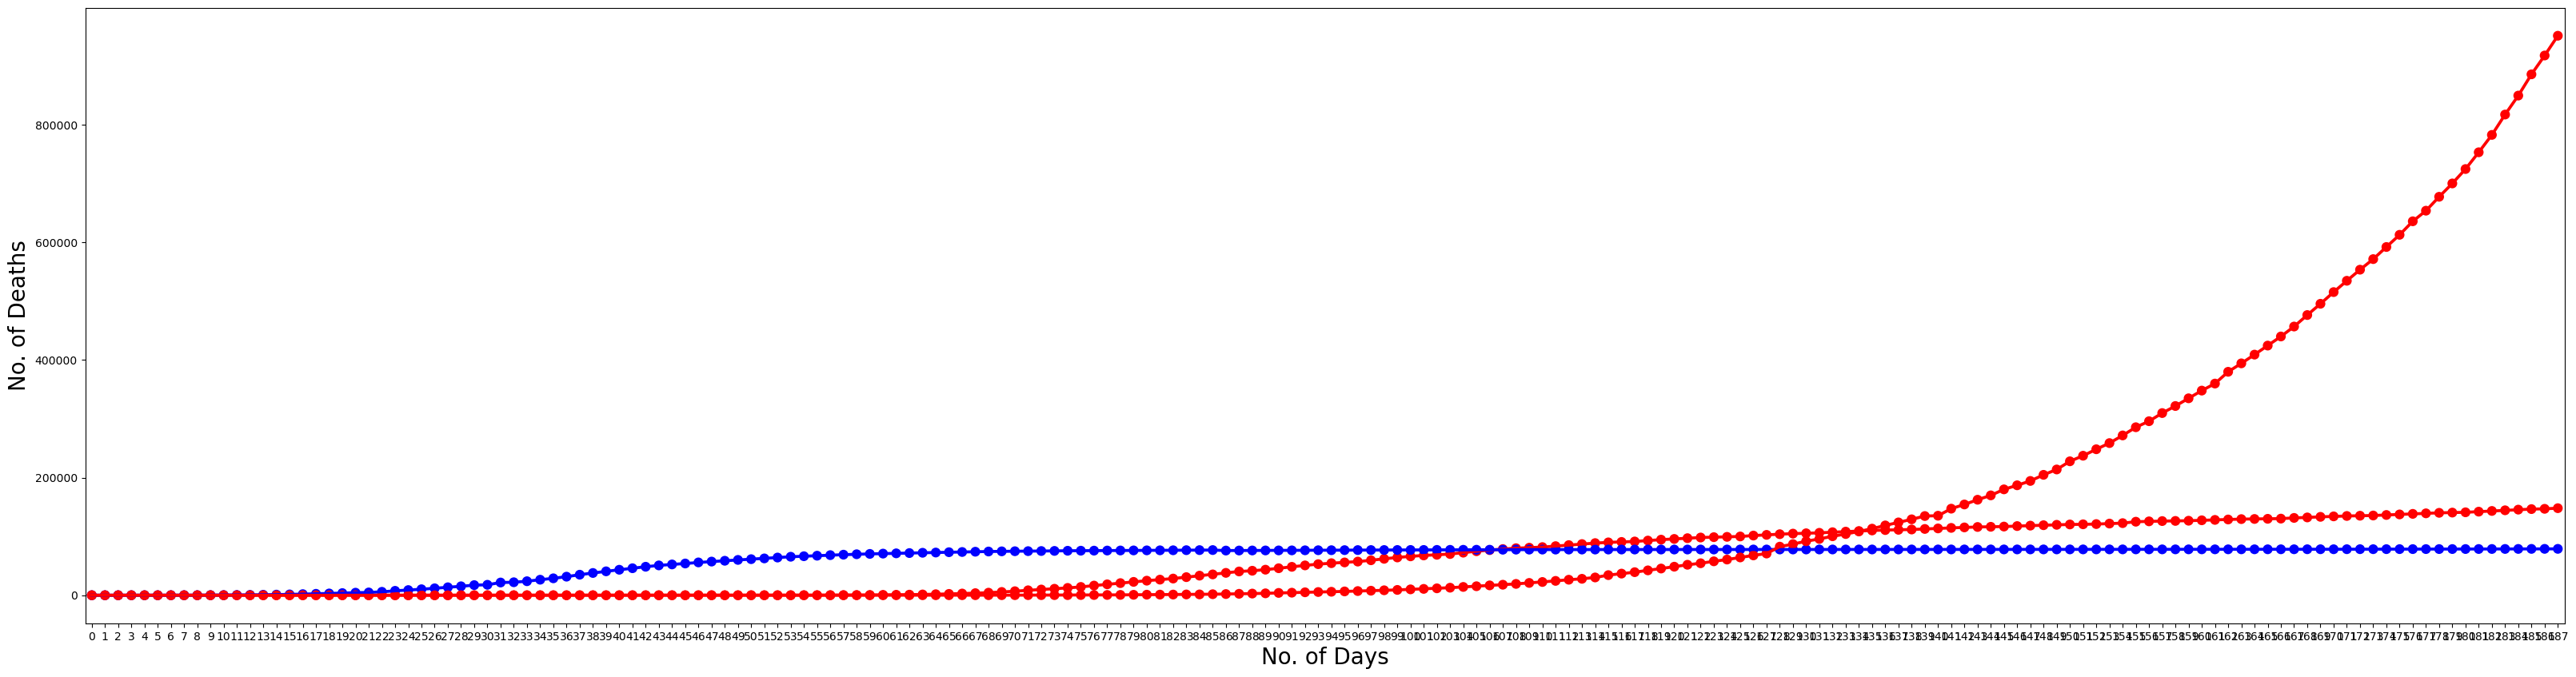

In [34]:
plt.figure(figsize=(40,10))

sns.pointplot(x=US.index, y=US.Deaths, color='Red')
sns.pointplot(x=china.index, y=china.Recovered, color='Blue')
sns.pointplot(x=india.index, y=india.Recovered, color='Red')

plt.xlabel('No. of Days', fontsize=20)
plt.ylabel('No. of Deaths', fontsize=20)

# Model Building

In [35]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [45]:
df=pd.read_csv('covid_19_clean_.csv', parse_dates=['Date'])

In [46]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [48]:
Confirmed = df.groupby(by='Date').sum()['Confirmed'].reset_index()

In [49]:
Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [50]:
deaths = df.groupby(by='Date').sum()['Deaths'].reset_index()

In [51]:
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [52]:
active = df.groupby(by='Date').sum()['Active'].reset_index()

In [53]:
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


# Making forcasting for confirmed cases

In [56]:
Confirmed.columns = ['ds','y']

In [57]:
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [58]:
from prophet import Prophet

In [59]:
m = Prophet()

In [61]:
m.fit(Confirmed)

19:30:16 - cmdstanpy - INFO - Chain [1] start processing
19:30:16 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = m.make_future_dataframe(periods=7)

In [70]:
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [71]:
Confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [65]:
forcast = m.predict(future)

In [66]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356186e+03,-1.165321e+05,8.292932e+04,-9.356186e+03,-9.356186e+03,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667734e+03,-1.058229e+05,9.552887e+04,-6.667734e+03,-6.667734e+03,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7.746625e+03
2,2020-01-24,-3.979282e+03,-1.014166e+05,1.147205e+05,-3.979282e+03,-3.979282e+03,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6.123967e+03
3,2020-01-25,-1.290830e+03,-8.732753e+04,1.221331e+05,-1.290830e+03,-1.290830e+03,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.237938e+04
4,2020-01-26,1.397622e+03,-9.117623e+04,1.129499e+05,1.397622e+03,1.397622e+03,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8.615766e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674928e+07,1.663745e+07,1.684891e+07,1.674224e+07,1.675592e+07,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,1.674820e+07
191,2020-07-31,1.695352e+07,1.685514e+07,1.707189e+07,1.694103e+07,1.696728e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.696362e+07
192,2020-08-01,1.715776e+07,1.705441e+07,1.728110e+07,1.713717e+07,1.717854e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.717143e+07
193,2020-08-02,1.736200e+07,1.724719e+07,1.748286e+07,1.733319e+07,1.739268e+07,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,1.736922e+07


In [67]:
forcast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.034240e+04,8.292932e+04,-1.165321e+05
1,2020-01-23,-7.746625e+03,9.552887e+04,-1.058229e+05
2,2020-01-24,6.123967e+03,1.147205e+05,-1.014166e+05
3,2020-01-25,1.237938e+04,1.221331e+05,-8.732753e+04
4,2020-01-26,8.615766e+03,1.129499e+05,-9.117623e+04
...,...,...,...,...
190,2020-07-30,1.674820e+07,1.684891e+07,1.663745e+07
191,2020-07-31,1.696362e+07,1.707189e+07,1.685514e+07
192,2020-08-01,1.717143e+07,1.728110e+07,1.705441e+07
193,2020-08-02,1.736922e+07,1.748286e+07,1.724719e+07


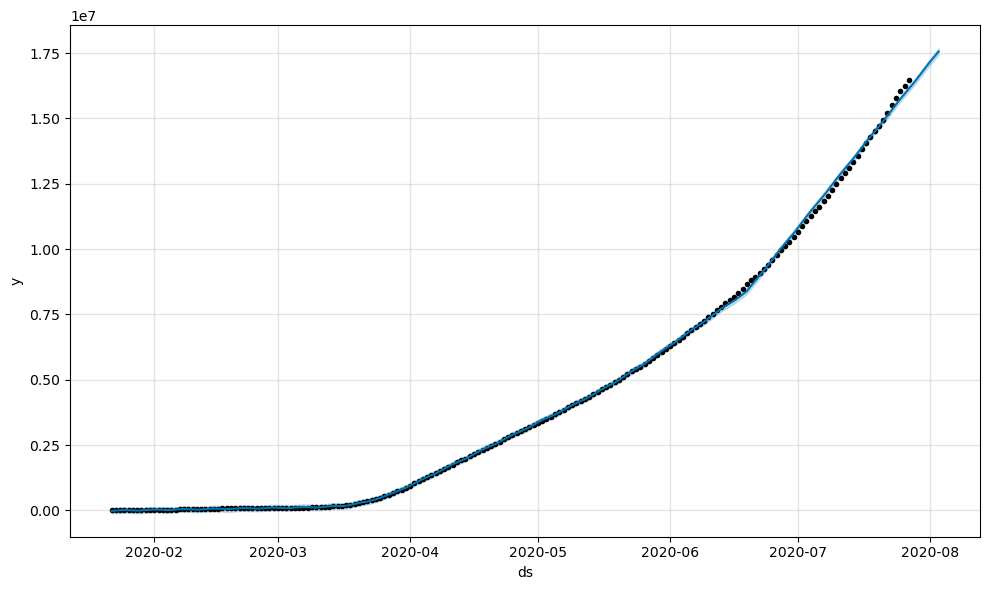

In [69]:
m.plot(forcast)
plt.show()

In [79]:
import plotly
import plotly.express as px

In [82]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [85]:
world = df.groupby(by='Country/Region')[["Confirmed","Active","Deaths","Recovered"]].sum().reset_index()

In [86]:
world

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611
